Importar librerías necesarias

In [1]:
import Modelos
import importlib
importlib.reload(Modelos)

<module 'Modelos' from 'g:\\My Drive\\Tesis\\Codigos\\optimization_model\\Modelos.py'>

### Variables de ajuste

In [11]:
cantidadNodos = [5, 6, 11]
confiabilidadObjetivoSerie = [0.55, 0.75, 0.89] # Confiabilidad alta
# confiabilidadObjetivoSerie = [0.15, 0.25, 0.3]
confiabilidadObjetivoParalelo = [0.99,0.9999,0.99999]

costos = {1: 1, 2: 3, 3: 7}
confiabilidadNodos = {1: 0.7, 2: 0.8, 3: 0.9}
# confiabilidadNodos = {1: 0.9, 2: 0.95, 3: 0.99} # Confiabilidad alta

## Caso SERIE

In [3]:
costosSerie = [] # Lista para almacenar los costos asociados
tipoNodosSerie = []

for nodos in cantidadNodos:
    for confiabilidad in confiabilidadObjetivoSerie:
        model_base = Modelos.base_model(nodos, confiabilidadNodos, costos) # Crear modelo base
        costo, variables = Modelos.serie_model(model_base, nodos, confiabilidad, confiabilidadNodos, costos)# Ejecutar modelo en serie

        if variables is None:  # Cuando no hay solución
            print(f"No se encontró solución={nodos} y confiabilidad={confiabilidad}")
            costosSerie.append((nodos, confiabilidad, None))
            tipoNodosSerie.append({'Low': 0, 'Medium': 0, 'High': 0})
            continue

        costosSerie.append((nodos, confiabilidad, costo))# Almacenar resultados de costos

        # Procesar variables de decisión para obtener tipos de nodo
        tipoNodo = {'Low': 0, 'Medium': 0, 'High': 0}
        for var, value in variables.items():
            if var.startswith("x"):
                _, tipo = map(int, var.split('[')[1].split(']')[0].split(','))
                if tipo == 1:
                    tipoNodo['Low'] += int(value)
                elif tipo == 2:
                    tipoNodo['Medium'] += int(value)
                elif tipo == 3:
                    tipoNodo['High'] += int(value)
        tipoNodosSerie.append(tipoNodo)

Restricted license - for non-production use only - expires 2026-11-23


### Gráfica Costo vs Cantidad de Nodos para Diferentes Confiabilidades

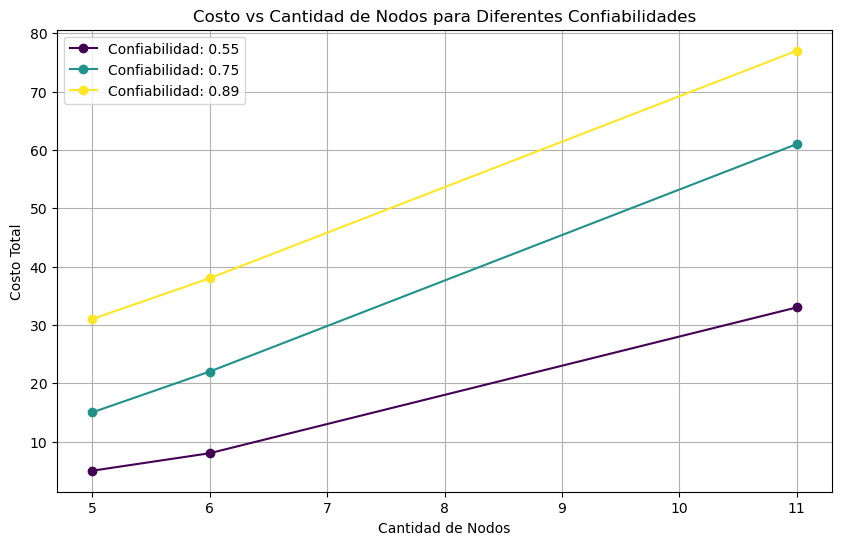

In [4]:
Modelos.grafico_costo_vs_cantidad_nodos_general(costosSerie)

### Gráfica de Distribución por Rango de Confiabilidad

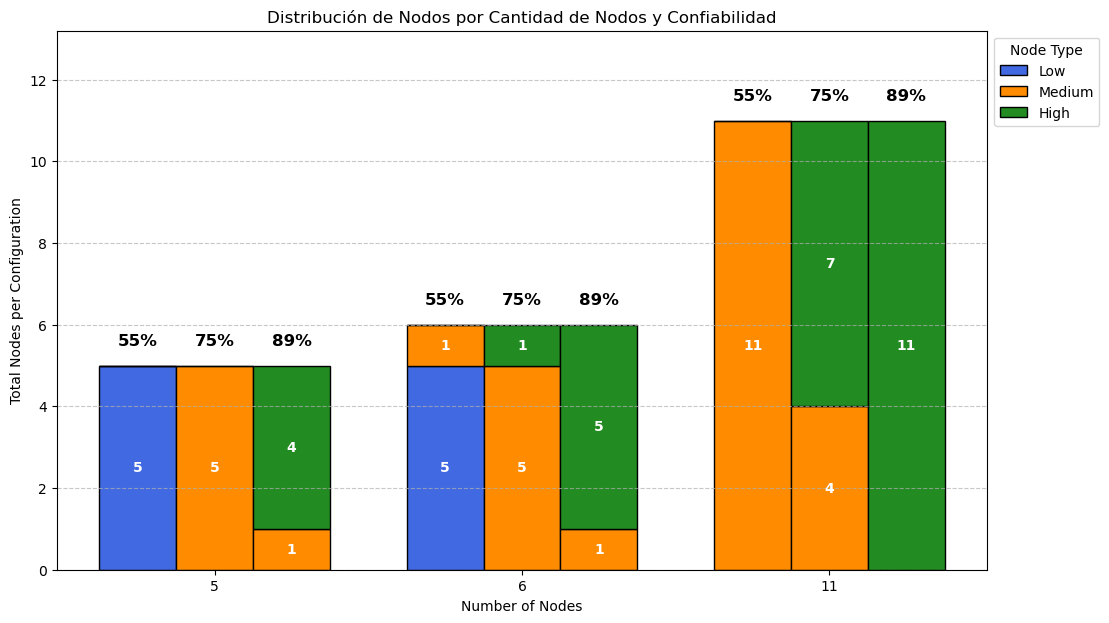

In [5]:
Modelos.grafico_barras_confiabilidad(costosSerie, tipoNodosSerie)

### Resultados en tabla

In [6]:
Modelos.mostrarResultadosTabla2(costosSerie, tipoNodosSerie)


Resultados en formato tabular:

╔═════════╦═════════════════╦═════════╦═══════╦══════════╦════════╗
║   Nodos ║   Confiabilidad ║   Costo ║   Low ║   Medium ║   High ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       5 ║            0.55 ║       5 ║     5 ║        0 ║      0 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       5 ║            0.75 ║      15 ║     0 ║        5 ║      0 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       5 ║            0.89 ║      31 ║     0 ║        1 ║      4 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       6 ║            0.55 ║       8 ║     5 ║        1 ║      0 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       6 ║            0.75 ║      22 ║     0 ║        5 ║      1 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       6 ║            0.89 ║      38 ║     0 ║        1 ║      5 ║
╠═════════╬════

## Caso Paralelo

In [12]:
costoParalelo = []
tipoNodosParalelo = []

for nodos in cantidadNodos:
    for confiabilidad in confiabilidadObjetivoParalelo:
        model_base = Modelos.base_model(nodos, confiabilidadNodos, costos) # Crear modelo base
        costo, variables = Modelos.paralelo_model(model_base, nodos, confiabilidad, confiabilidadNodos, costos)# Ejecutar modelo en serie

        if variables is None:  # Cuando no hay solución
            print(f"No se encontró solución={nodos} y confiabilidad={confiabilidad}")
            costoParalelo.append((nodos, confiabilidad, None))
            tipoNodosParalelo.append({'Low': 0, 'Medium': 0, 'High': 0})
            continue

        costoParalelo.append((nodos, confiabilidad, costo))# Almacenar resultados de costos

        # Procesar variables de decisión para obtener tipos de nodo
        tipoNodo = {'Low': 0, 'Medium': 0, 'High': 0}
        for var, value in variables.items():
            if var.startswith("x"):
                _, tipo = map(int, var.split('[')[1].split(']')[0].split(','))
                if tipo == 1:
                    tipoNodo['Low'] += int(value)
                elif tipo == 2:
                    tipoNodo['Medium'] += int(value)
                elif tipo == 3:
                    tipoNodo['High'] += int(value)
        tipoNodosParalelo.append(tipoNodo)

In [13]:
Modelos.mostrarResultadosTabla2(costoParalelo, tipoNodosParalelo)


Resultados en formato tabular:

╔═════════╦═════════════════╦═════════╦═══════╦══════════╦════════╗
║   Nodos ║   Confiabilidad ║   Costo ║   Low ║   Medium ║   High ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       5 ║         0.99    ║       5 ║     5 ║        0 ║      0 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       5 ║         0.9999  ║      23 ║     2 ║        0 ║      3 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       5 ║         0.99999 ║      35 ║     0 ║        0 ║      5 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       6 ║         0.99    ║       6 ║     6 ║        0 ║      0 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       6 ║         0.9999  ║      16 ║     1 ║        5 ║      0 ║
╠═════════╬═════════════════╬═════════╬═══════╬══════════╬════════╣
║       6 ║         0.99999 ║      30 ║     2 ║        0 ║      4 ║
╠═════════╬════

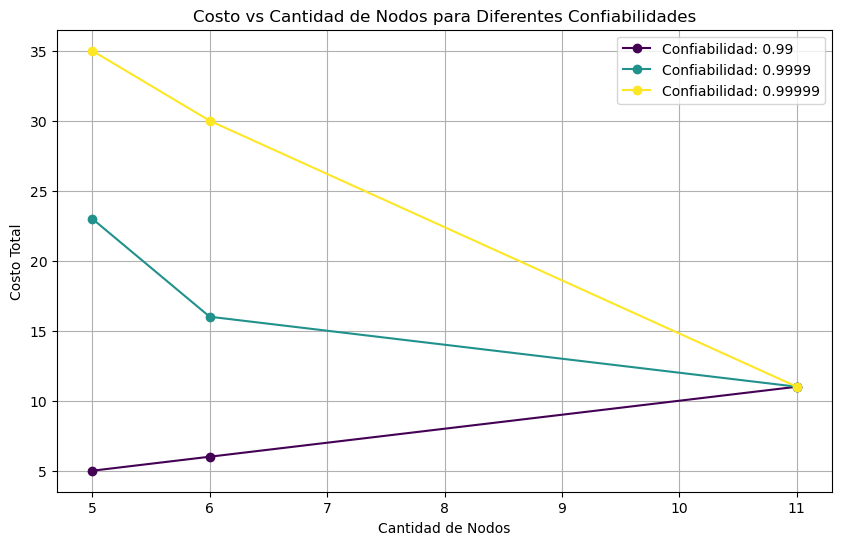

In [14]:
Modelos.grafico_costo_vs_cantidad_nodos_general(costoParalelo)

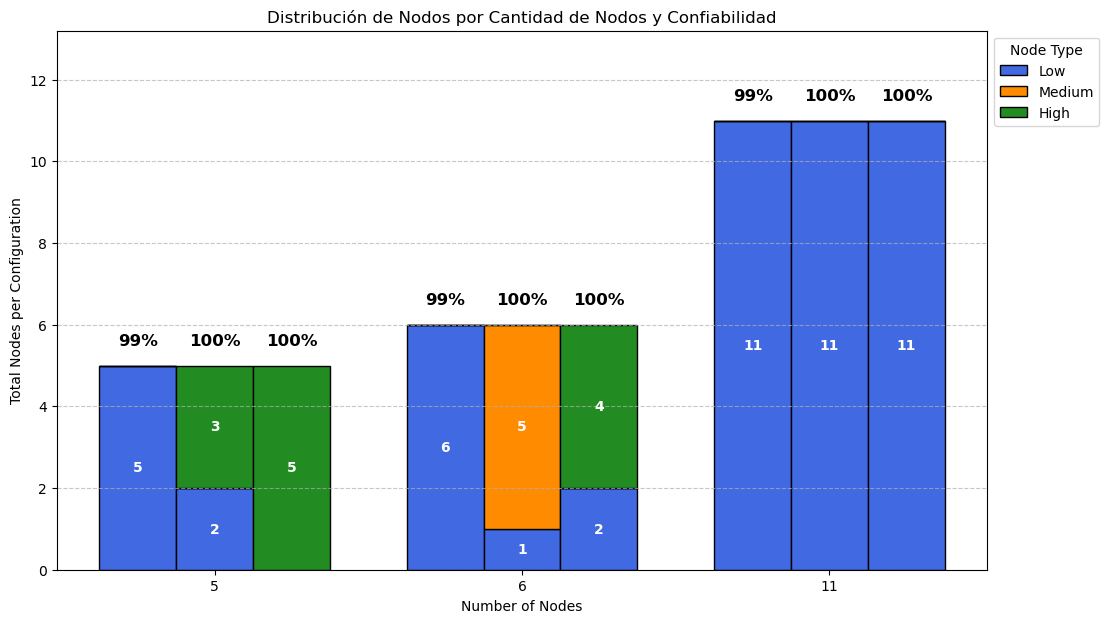

In [15]:
Modelos.grafico_barras_confiabilidad(costoParalelo, tipoNodosParalelo)